# Deadly Visualizations!!!

![Image](../images/viz_types_portada.png)

## Setup

First we need to create a basic setup which includes:

- Importing the libraries.

- Reading the dataset file (source [Instituto Nacional de Estadística](https://www.ine.es/ss/Satellite?L=es_ES&c=Page&cid=1259942408928&p=1259942408928&pagename=ProductosYServicios%2FPYSLayout)).

- Create a couple of columns and tables for the analysis.

__NOTE:__ some functions were already created in order to help you go through the challenge. However, feel free to perform any code you might need.

In [144]:
# imports

import sys
import re
sys.path.insert(0, "../modules")
# 
import numpy as np
import pandas as pd

import plotly.express as px
import cufflinks as cf
cf.go_offline()

import module as mod     # functions are include in module.py

In [145]:
# read dataset

deaths = pd.read_csv('../data/7947.csv', sep=';', thousands='.')

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [146]:
# add some columns...you'll need them later

deaths['cause_code'] = deaths['Causa de muerte'].apply(mod.cause_code)
deaths['cause_group'] = deaths['Causa de muerte'].apply(mod.cause_types)
deaths['cause_name'] = deaths['Causa de muerte'].apply(mod.cause_name)

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
 5   cause_code       301158 non-null  object
 6   cause_group      301158 non-null  object
 7   cause_name       301158 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.4+ MB


In [147]:
# lets check the categorical variables

var_list = ['Sexo', 'Edad', 'Periodo', 'cause_code', 'cause_name', 'cause_group']

categories = mod.cat_var(deaths, var_list)
categories

,categorical_variable,number_of_possible_values,values
0,cause_code,117,"[001-102, 001-008, 001, 002, 003, 004, 005, 00..."
1,cause_name,117,"[I-XXII.Todas las causas, I.Enfermedades infec..."
2,Periodo,39,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."
3,Edad,22,"[Todas las edades, Menos de 1 año, De 1 a 4 añ..."
4,Sexo,3,"[Total, Hombres, Mujeres]"
5,cause_group,2,"[Multiple causes, Single cause]"


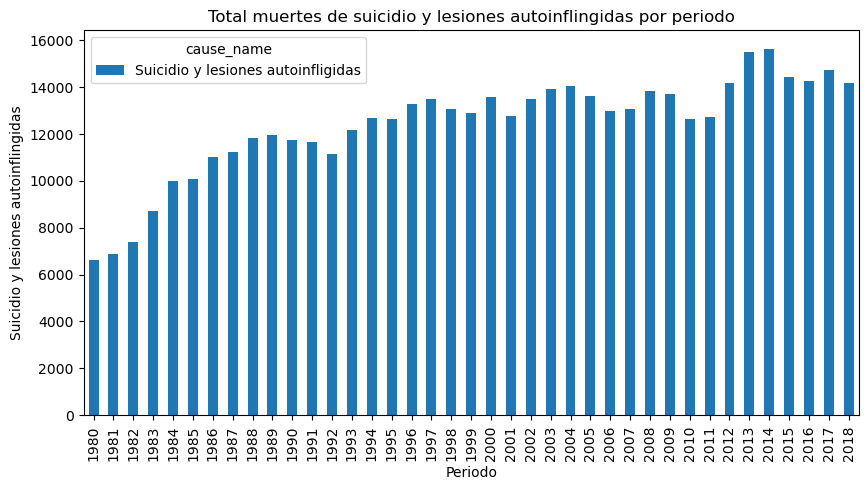

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
# Filtrar las causas de muerte violentas (puedes ajustar esto según tus datos)
total_muertes = ['098']  # Ejemplo de código de causa violenta
# Agrupar por 'Sexo' y 'cause_code' y sumar el total de muertes
df_grouped = deaths[deaths['cause_code'].isin(total_muertes)].groupby(['Periodo', 'cause_name'])['Total'].sum().unstack()
# Crear el gráfico
df_grouped.plot(kind='bar', figsize=(10, 5))
plt.title('Total muertes de suicidio y lesiones autoinflingidas por periodo')
plt.xlabel('Periodo')
plt.ylabel('Suicidio y lesiones autoinflingidas')
plt.show()

In [150]:
# we need also to create a causes table for the analysis

causes_table = deaths[['cause_code', 'cause_name']].drop_duplicates().sort_values(by='cause_code').reset_index(drop=True)

causes_table

,cause_code,cause_name
0,001,Enfermedades infecciosas intestinales
1,001-008,I.Enfermedades infecciosas y parasitarias
2,001-102,I-XXII.Todas las causas
3,002,Tuberculosis y sus efectos tardíos
4,003,Enfermedad meningocócica
...,...,...
112,098,Suicidio y lesiones autoinfligidas
113,099,Agresiones (homicidio)
114,100,Eventos de intención no determinada
115,101,Complicaciones de la atención médica y quirúrgica


In [149]:
# And some space for free-style Pandas!!! (e.g.: df['column_name'].unique())





## Lets make some transformations

Eventhough the dataset is pretty clean, the information is completely denormalized as you could see. For that matter a collection of methods (functions) are available in order to generate the tables you might need:

- `row_filter(df, cat_var, cat_values)` => Filter rows by any value or group of values in a categorical variable.

- `nrow_filter(df, cat_var, cat_values)` => The same but backwards. 

- `groupby_sum(df, group_vars, agg_var='Total', sort_var='Total')` => Add deaths by a certain variable.

- `pivot_table(df, col, x_axis, value='Total')`=> Make some pivot tables, you might need them...

__NOTE:__ be aware that the filtering methods can perform a filter at a time. Feel free to perform the filter you need in any way you want or feel confortable with.

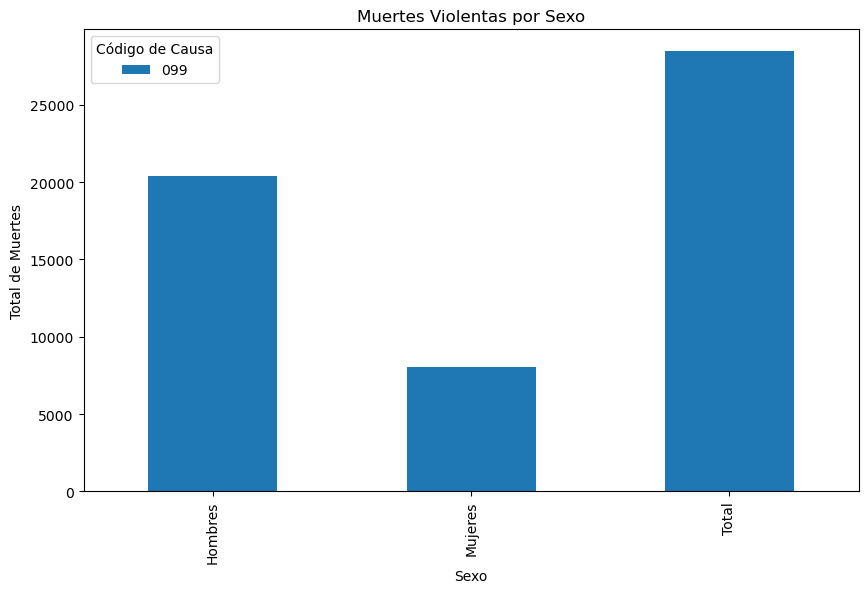

In [57]:
# Example 1

dataset = mod.row_filter(deaths, 'Sexo', ['Total'])
dataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])
dataset.head()
df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Muertes Violentas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Total de Muertes')
plt.legend(title='Código de Causa')
plt.show()

In [9]:
# Example 2

group = ['cause_code','Periodo']
dataset = mod.groupby_sum(deaths, group)
dataset.head()


,cause_code,Periodo,Total
0,001-102,2018,1710884
1,001-102,2017,1698092
2,001-102,2015,1690272
3,001-102,2016,1642444
4,001-102,2012,1611800


In [95]:
# Example 3

dataset = mod.pivot_table(dataset, 'cause_name', 'Periodo')
dataset.head()


KeyError: 'cause_name'

## ...and finally, show me some insights with Plotly!!!

In [16]:
# Cufflinks histogram

dataset.iplot(kind='hist',
                     title='VIZ TITLE',
                     yTitle='AXIS TITLE',
                     xTitle='AXIS TITLE')


In [18]:
# Cufflinks bar plot

dataset.iplot(kind='bar',
                  x='VARIABLE',
                  xTitle='AXIS TITLE',
                  yTitle='AXIS TITLE',
                  title='VIZ TITLE')


KeyError: "None of ['VARIABLE'] are in the columns"

In [ ]:
# Cufflinks line plot
'''
dataset_line.iplot(kind='line',
                   x='VARIABLE',
                   xTitle='AXIS TITLE',
                   yTitle='AXIS TITLE',
                   title='VIZ TITLE')
'''

In [ ]:
# Cufflinks scatter plot
'''
dataset_scatter.iplot(x='VARIABLE', 
                      y='VARIABLE', 
                      categories='VARIABLE',
                      xTitle='AXIS TITLE', 
                      yTitle='AXIS TITLE',
                      title='VIZ TITLE')
'''